# Instructions
* You must work on this assignment individually.
* This assignment contributes 20% towards your final mark in FIT5211.
* The subjects are sorting, trees and dynamic programming.
* The exercises are roughly given by increasing difficulty.
* You may create auxiliary/helper functions for each question, as long as you use the pre-defined functions, if any is given.
* Unit tests have only been provided for Exercise 1. You will need to write your own tests when they are not provided. 
* The expected deliverable is this Jupyter Notebook, completed with your answers.
* For questions on this assigment, please use the Moodle forum https://moodle.vle.monash.edu/mod/forum/view.php?id=4764773.
* The deadline is May 25, 23:55 via Moodle: https://moodle.vle.monash.edu/course/view.php?id=42910&section=5#5. If this does not work, and only in this case, send your Notebook to pierre.lebodic@monash.edu.
* The late penalty is 10 marks (deducted from your original mark) per late day

# Exercise 1: Sorting Lists of Pairs (50 marks)

(Note that in this exercise, questions may be attempted without having completed all previous questions)

Consider the abstract Python class below:

In [1]:
class Comparison:
    def __init__(self):
        pass
    
    #returns True if the two objects are comparable,
    #False otherwise
    def areComparable(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if the two objects are equal,
    #False otherwise
    def __eq__(self, other):
        raise Exception("NotImplementedException")
   
    #returns True if self > other,
    #False otherwise
    def __gt__(self, other):
        raise Exception("NotImplementedException")
        
    #returns True if self < other,
    #False otherwise
    def __lt__(self, other):
        raise Exception("NotImplementedException")    
        
    def __ne__(self, other):
        return not self.__eq__(other)
                
    def __ge__(self, other):
        return self.__eq__(other) or self.__gt__(other)

    def __le__(self, other):
        return self.__eq__(other) or self.__lt__(other)
        
    def compare(self, other):
        if self.areComparable(other) is False:
            return None
        elif self == other:
            return 0
        elif self < other:
            return -1
        elif self > other:
            return 1
        else:
            assert False, "Inconsistent operation definitions"

The Comparison class provides a way to model items that are not always comparable. For instance, the pair of integers $(5, 10)$ is greater than $(4, 8)$, but it is not comparable to $(6, 5)$, because $5 < 6$ and $10 > 5$.

In this exercise, we will look into different ways to sort list of pairs. We will suppose that the pairs in a list are all different.  

## Question 1.1 (10 marks)

The rules of comparison between two Pairs $(a, b)$ and $(c, d)$ are:
* $(a, b) == (c, d)$ if and only if $a == c$ and $b == d$,
* $(a, b) > (c, d)$ if and only if ($a > c$ and $b \geq d$) or ($a \geq c$ and $b > d$),
* $(a, b) < (c, d)$ if and only if ($a < c$ and $b \leq d$) or ($a \leq c$ and $b < d$).

We say that $(a, b)$ and $(c, d)$ are comparable if 
* $(a, b) == (c, d)$, or
* $(a, b) > (c, d)$, or
* $(a, b) < (c, d)$.

We ask that you implement the rules above in the class called Pair below, by completing the functions that have a comment "#TODO" in the body. Note that the class Pair inherits from Comparison.

In [2]:
class Pair(Comparison):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({},{})".format(self.x, self.y)
        
    def areComparable(self, other):
        if (self == other) or (self > other) or (self < other):
            return True
        else:
            return False
        
    def __eq__(self, other):
        if (self.x == other.x) and (self.y == other.y):
            return True
        else: 
            return False
    
    def __gt__(self, other):
        if ((self.x > other.x) and (self.y >= other.y)) or ((self.x >= other.x) and (self.y > other.y)):
            return True
        else: 
            return False
        
    def __lt__(self, other):
        if ((self.x < other.x) and (self.y <= other.y)) or ((self.x <= other.x) and (self.y < other.y)):
            return True
        else: 
            return False

We provide a test class below. You don't need to edit it, but the class Pair you write need pass these tests! 

In [3]:
import unittest

class TestPair(unittest.TestCase):
    def setUp(self):
        self.v00 = Pair(0,0)
        self.v01 = Pair(0,1)
        self.v10 = Pair(1, 0)
        self.v11 = Pair(1, 1)
        self.v21 = Pair(2, 1)
        self.v31 = Pair(3, 1)
        self.v23 = Pair(2, 3)
        self.v23other = Pair(2, 3)
        
    def test_areComparable(self):
        self.assertTrue(self.v00.areComparable(self.v01))
        self.assertTrue(self.v01.areComparable(self.v00))
        
        self.assertTrue(self.v11.areComparable(self.v00))
        self.assertTrue(self.v00.areComparable(self.v11))
        
        self.assertTrue(self.v21.areComparable(self.v23))
        self.assertTrue(self.v23.areComparable(self.v21))
        
        self.assertTrue(self.v23.areComparable(self.v23))
        
        self.assertTrue(self.v23.areComparable(self.v23other))
        self.assertTrue(self.v23other.areComparable(self.v23))
        
        self.assertFalse(self.v01.areComparable(self.v10))
        self.assertFalse(self.v10.areComparable(self.v01))
        
        self.assertFalse(self.v31.areComparable(self.v23))
        self.assertFalse(self.v23.areComparable(self.v31))
        
    def test_eq(self):
        self.assertTrue(self.v00 == self.v00)
        self.assertTrue(self.v21 == self.v21)
        self.assertTrue(self.v23 == self.v23)
        self.assertTrue(self.v23 == self.v23other)
        
        self.assertFalse(self.v00 == self.v11)
        self.assertFalse(self.v21 == self.v11)
        self.assertFalse(self.v21 == self.v23)
        
    def test_ne(self):
        self.assertFalse(self.v00 != self.v00)
        self.assertFalse(self.v21 != self.v21)
        self.assertFalse(self.v23 != self.v23)
        self.assertFalse(self.v23 != self.v23other)
        
        self.assertTrue(self.v00 != self.v11)
        self.assertTrue(self.v21 != self.v11)
        self.assertTrue(self.v21 != self.v23)
        
    def test_gt(self):
        self.assertTrue(self.v01 > self.v00)
        self.assertTrue(self.v10 > self.v00)
        self.assertTrue(self.v31 > self.v21)
        
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v00 > self.v01)
        self.assertFalse(self.v21 > self.v31)
        
        self.assertFalse(self.v10 > self.v01)
        self.assertFalse(self.v01 > self.v10)
        self.assertFalse(self.v31 > self.v23)
        self.assertFalse(self.v23 > self.v31)
        
    def test_lt(self):
        self.assertFalse(self.v01 < self.v00)
        self.assertFalse(self.v10 < self.v00)
        self.assertFalse(self.v31 < self.v21)
        
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v00 < self.v01)
        self.assertTrue(self.v21 < self.v31)
        
        self.assertFalse(self.v10 < self.v01)
        self.assertFalse(self.v01 < self.v10)
        self.assertFalse(self.v31 < self.v23)
        self.assertFalse(self.v23 < self.v31)

In [4]:
test = TestPair()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.018s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

In the following questions, we suppose that we have a set of Pairs, and that not every two pairs in that set are comparable.

## Question 1.2 (10 marks)

Given a list $l$ of Pairs in no particular order, use a sorting algorithm similar to *selection sort* to sort $l$ such that, at the end of the algorithm, for every two pairs $l[i]=(a, b)$ and $l[j]=(c, d)$ at index $i$ and $j$ in $l$, respectively, with $i <j$, we have:
* either $(a, b) \leq (c, d)$,
* or $(a, b)$ and $(c, d)$ are not comparable.

In [5]:
def pairSort(l):
    for fillslot in range(len(l)-1,0,-1):
        positionOfMax=0
        for location in range(1,fillslot+1):
            if l[location]>l[positionOfMax]:
                positionOfMax = location
        l[fillslot],  l[positionOfMax] = l[positionOfMax], l[fillslot]

Again, we provide a test class below. You don't need to edit it, but the method pairsort you wrote needs to pass these tests! 

In [6]:
import unittest
import random

class TestPairSort(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSort
    
    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        sortedl = self.sortAlgo(l)
        #for item in sortedl: print(item)
        self.checkorder(l)
        
    def test4(self):
        #in this test we suppose x and y are not fixed
        #we suppose there is no two pairs that are comparable
        l = [self.PairClass(8, 8), self.PairClass(5, 10), self.PairClass(10, 8), self.PairClass(12, 5)]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
        
    def test5(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we only test one case
        l = [self.PairClass(5, 8), self.PairClass(10, 10), self.PairClass(12, 5), self.PairClass(9, 5),
             self.PairClass(5, 10), self.PairClass(7, 2), self.PairClass(6, 10) ]
        self.sortAlgo(l)
        #for item in l: print(item)
        self.checkorder(l)
    
    def test6(self):
        #in this test we suppose x and y are not fixed
        #the input is in arbitrary order
        #we generate many cases
        for size in range(0, 100):
            #create a list
            l = []
            xs = random.sample(range(0, 100), size)
            xy = random.sample(range(0, 100), size)
            for i in range(0, size):
                l.append(self.PairClass(xs[i], xy[i]))
            self.sortAlgo(l)
            #for item in l: print(item)
            self.checkorder(l)
        
    def checkorder(self, l):
        for i in range(0, len(l)-1):
            for j in range(i, len(l)-1):
                if l[i].areComparable(l[j]):
                    self.assertTrue(l[i] <= l[j], "{} and {} are not well ordered".format(l[i], l[j]) )

In [7]:
test = TestPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.931s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.3 (5 marks)

Suppose we have a list of Pairs of integers.
We want to implement a comparison mechanism between two pairs of integers using a function **pairKey**, which takes a pair as input and outputs a single number. The function pairKey should be such that for two pairs $(a, b)$ and $(c, d)$,
* $(a,b) > (c,d)$ implies $pairKey((a,b)) > pairKey((c,d))$,
* $(a,b) < (c,d)$ implies $pairKey((a,b)) < pairKey((c,d))$,
* $(a,b) == (c,d)$ implies $pairKey((a,b)) == pairKey((c,d))$.

In [8]:
def pairKey(self):
    output = self.x + self.y
    return output

If you have defined the function pairKey correctly, we should now be able to use the built-in sort function of Python to sort our Pairs:

In [9]:
def pairSortWithKey(l):
    l.sort(key = pairKey)

(For more information on what the above does, please refer to https://docs.python.org/3/howto/sorting.html)

In [10]:
class TestKeyPairSort(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortWithKey

In [11]:
test = TestKeyPairSort()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.777s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.4 (5 marks)

Prove that the pairKey function you have defined above provides a guarantee that, if used as key for Python's sort, then the list will be sorted as stated in Queston 1.2.

Answer: I set pairKey = pair.x + pair.y. For example, if pair A = (2,1), then pairKey = 2 + 1 = 3.  

Case 1: If $pairKey((a,b)) > pairKey((c,d))$, we have:
* either $(a, b) > (c, d)$, e.g. (a,b) = (2,1) and (c,d) = (2,0)
* or $(a, b)$ and $(c, d)$ are not comparable, e.g. (a,b) = (2,1) and (c,d) = (0,2)

Case 2: If $pairKey((a,b)) < pairKey((c,d))$, we have:
* either $(a, b) < (c, d)$, e.g. (a,b) = (2,1) and (c,d) = (2,2)
* or $(a, b)$ and $(c, d)$ are not comparable, e.g. (a,b) = (2,1) and (c,d) = (1,3)

Case 3: If $pairKey((a,b)) = pairKey((c,d))$, we have:
* either $(a, b) = (c, d)$, e.g. (a,b) = (2,1) and (c,d) = (2,1)
* or $(a, b)$ and $(c, d)$ are not comparable, e.g. (a,b) = (2,1) and (c,d) = (1,2)

When I use pairKey as the key for Python's sort, I can get the following result according to case 2 and 3 above.  
For every two pairs $l[i]=(a, b)$ and $l[j]=(c, d)$ at index $i$ and $j$ in $l$, respectively, with $i <j$, we have:
* either $(a, b) \leq (c, d)$,
* or $(a, b)$ and $(c, d)$ are not comparable.

Therefore, the list will be sorted as stated in Queston 1.2 if pairKey is used as the key for Python's sort.

## Question 1.5 (5 marks)

(We have *not* covered the concept of stability in this unit. If you are not yet familiar with this concept, learning about it is part of the question.)

Use the fact that Python's sort is stable to provide a simple solution to sort a list of pairs as stated in Question 1.2. Use unit testing as in the previous questions to test your solution. Both your solution and the unit testing will be assessed. (no need to rewrite *new* test cases; use the old ones).

In [12]:
def pairSortUsingStability(l):
    from operator import itemgetter, attrgetter
#     sorted(l, key=attrgetter('x', 'y'))
    l.sort(key=attrgetter('x', 'y'))

In [13]:
class TestPairSortUsingStability(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortUsingStability

In [14]:
test = TestPairSortUsingStability()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.578s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.6 (10 marks)

Define a function pairSortFast that takes a list $l$ of $n$ Pairs as input and sort this list in $O(n)$ time in the worst case (not the amortised worst case). Suppose that any pair $(a,b)$ in $l$ is such that $a$ and $b \in \{0, \dots, U\}$, where $U$ is a small integer. Hint: *a clever hashing function* may help.

In [15]:
def pairSortFast(l):

    sorted_list = []
    l_length = len(l)
    max_key = 0
    
    # Create hash table
    for i in range(l_length):
        key = pairKey(l[i])
        if key > max_key:
            max_key = key      
    hash_table = [[]]*(max_key+1)
    
    # put pair into hash table based on pairkey value
    for j in range(l_length):
        key = pairKey(l[j])
        hash_table[key] = hash_table[key] + [l[j]]
    
    # move item from hash table to sorted list
    for k in range(len(hash_table)):
        sorted_list = sorted_list + hash_table[k]

    # move item from sorted list to original list
    for z in range(len(sorted_list)):
        l[z] = sorted_list[z]


In [16]:
class TestPairSortFast(TestPairSort):
    def setUp(self):
        self.PairClass = Pair
        self.sortAlgo = pairSortFast

In [17]:
test = TestPairSortFast()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

......
----------------------------------------------------------------------
Ran 6 tests in 0.566s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

## Question 1.7 (5 marks)

Thoroughly benchmark all the sorting algorithms you have written, and plot their running time as a function of the size of the input list. You may use methods and code seen in the lectures or tutes and pracs during the semester.

Maximum computing time: 0:00:40
Actual computing time: 0:00:02


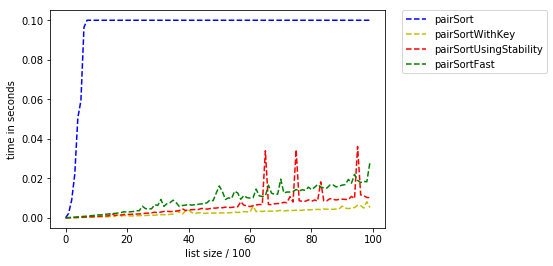

In [20]:
from timeit import default_timer as timer
import datetime
import random
# matplotlib may need to be installed separately
import matplotlib.pyplot as plt

sorting_algorithms = [pairSort, pairSortWithKey, pairSortUsingStability, pairSortFast]
#matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
styles = {}
styles[pairSort] = "b--"
styles[pairSortWithKey] = "y--"
styles[pairSortUsingStability] = "r--"
styles[pairSortFast] = "g--"
def generatelist(n, lower = 0, upper = 100, seed = 0):
#https://docs.python.org/3/library/random.html
    random.seed(seed)
    l = [None] * n
    for i in range(0,n):
        l[i] = Pair(random.randrange(lower, upper), random.randrange(lower, upper))
    return l
def computeandplot(sorting_algorithms):
    step = 100
    nsamples = 100
    samples = range(0, nsamples)
    timelimit = 0.1 #seconds, per run
    totaltime = 0
    print("Maximum computing time:", \
        str(datetime.timedelta(seconds=\
        timelimit*nsamples*len(sorting_algorithms))))
    for sortalgo in sorting_algorithms:
        attimelimit = False
        times = [timelimit for _ in samples]
        for i in samples:
            if i == 0:
                times[i] = 0
                continue
            n = step * i
            if attimelimit == False:
                l = generatelist(n)
                start = timer()
                sortalgo(l)
                end = timer()
                times[i] = end - start
                totaltime += times[i]
                if times[i] > timelimit:
                    times[i] = timelimit
                    attimelimit = True
        plt.plot(samples, times, \
                    styles[sortalgo], \
                    label=sortalgo.__name__)
    print("Actual computing time:", str(datetime.timedelta(seconds=int(totaltime))))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("list size / {}".format(step))
    plt.ylabel("time in seconds")
    plt.show()
computeandplot(sorting_algorithms)


# Exercise 2 (25 marks)

We are again interested in lists of pairs of integers. However, this time, we want to store these pairs into a rooted tree $T$. More precisely, each node of $T$ will store a pair of $l$. This tree $T$ will have the property that for each inner node $k$ that stores a pair $(a, b)$, the pair $(c, d)$ stored at a node in the subtree of $k$ satisfies $(a, b) \leq (c, d)$. Furthermore, the pairs stored at sibling nodes must be non-comparable.

We will suppose that the root of the tree is a dummy pair $(-1, -1)$.

You need to provide a unit test for each question in this exercise where code is required. Each question is evaluated on the correctness of your code and the thoroughness of your unit tests.

## Question 2.1 (10 marks)

Define a class that stores the tree $T$ for any given list of pairs. The \_\_init\_\_() function must take a list as input and build the tree accordingly. An insert() function must allow the insertion of a pair to an initialised tree. In $O()$, what is the running time complexity of the functions you defined?

In [135]:
class TreeNode:
    def __init__(self,key,val,children_list=[],parent=None):
        self.key = key
        self.payload = val
        self.children_list = children_list
        self.parent = parent

    def hasChildren(self):
        return self.children_list

    def isChildren(self):
        return (self.parent) and (self in self.parent.children_list)

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not self.children_list

In [168]:
class PairTree:

    def __init__(self,l):
        self.root = TreeNode(pairKey(Pair(-1,-1)),Pair(-1,-1))
        self.size = 1
        l.sort(key = pairKey)
        for i in range(len(l)):
            self.put(pairKey(l[i]),l[i])

    def length(self):
        return self.size

    def __len__(self):
        return self.size
    
    def put(self,key,val):
        if self.root:
            self._put(key,val,self.root)
        else:
            self.root = TreeNode(key,val)
        self.size = self.size + 1

    def _put(self,key,val,currentNode):
        # Has children
        if currentNode.hasChildren():
            self._put(key,val,currentNode.children_list[0])
        # No children
        else:
            # Parent are comparable
            if val.areComparable(currentNode.payload):
                currentNode.children_list = currentNode.children_list + [TreeNode(key,val,parent=currentNode)]
            else:
                # Check parent until find comparable parent and add the node to this parent's children list
                found_comparable_parent = False
                parentNode = currentNode.parent
                while not found_comparable_parent:
                    
                    if val.areComparable(parentNode.payload):
                        found_comparable_parent = True
                    else:
                        currentNode = parentNode
                        parentNode = currentNode.parent
                # After finding comparable parent, check if any of this parent's children are comparable
                found_comparable_parent_children = False
                childrenIndex = 1
                while (not found_comparable_parent_children) and (childrenIndex < len(parentNode.children_list)): 
                    nextChild = parentNode.children_list[childrenIndex]
                    if val.areComparable(nextChild.payload):
                        found_comparable_parent_children = True
                    else:
                        childrenIndex += 1
                # if found comparable children
                if found_comparable_parent_children:
                    self._insert(key,val,parentNode.children_list[childrenIndex])
                # not found comparable children
                else:
                    parentNode.children_list = parentNode.children_list + [TreeNode(key,val,parent=parentNode)]
                    
    def __setitem__(self,k,v):
        self.put(k,v)

    def insert(self,key,val):
        if self.root:
            self._insert(key,val,self.root)
        else:
            self.root = TreeNode(key,val)
        self.size = self.size + 1

    def _insert(self,key,val,currentNode):
        if val > currentNode.payload or val == currentNode.payload:
            # print("case 1")
            if currentNode.hasChildren():
                self._insert(key,val,currentNode.children_list[0])
            else:
                currentNode.children_list = currentNode.children_list + [TreeNode(key,val,parent=currentNode)]
        elif val < currentNode.payload:
            # add note between current and parant node
            # print("case 2")
            parentNode = currentNode.parent
            insertChildrenIndex = 0
            for i in range(len(parentNode.children_list)):
                if (parentNode.children_list[i].payload == currentNode.payload):
                    insertChildrenIndex = i
            t = TreeNode(key,val,parent=parentNode)
            t.children_list = t.children_list + [currentNode]
            parentNode.children_list[insertChildrenIndex] =  t
        elif not val.areComparable(currentNode.payload):
            # Check parent's children list until find a comparable child
            # print("case 3")
            found_comparable_parent_children = False
            childrenIndex = 1
            parentNode = currentNode.parent
            while (not found_comparable_parent_children) and (childrenIndex < len(parentNode.children_list)): 
                nextChild = parentNode.children_list[childrenIndex]
                if val.areComparable(nextChild.payload):
                    found_comparable_parent_children = True
                else:
                    childrenIndex += 1
            if found_comparable_parent_children:
                self._insert(key,val,parentNode.children_list[childrenIndex])
            else:
                parentNode.children_list = parentNode.children_list + [TreeNode(key,val,parent=parentNode)]




### Time complexity

The time complexity of function __init__ is O(n) because I use sort function first and it dominates the time complexity.  
The worst case time complexity of function insert is O(n) because it might compare all the data nodes in the tree.

### Unit Test

In [173]:
import unittest
import random

class TestPairTree(unittest.TestCase):
    def setUp(self):
        self.PairClass = Pair
        self.PairTreeClass = PairTree
                    

    def test1(self):
        #in this test we suppose x=0 for all entries
        #this means that the algorithm should do a regular bubble sort
        #we also suppose everything is already ordered
        l = [self.PairClass(0, 1), self.PairClass(0, 3), self.PairClass(0, 4), self.PairClass(0, 6), 
            self.PairClass(0, 8), self.PairClass(0, 15), ]
        pairTree = self.PairTreeClass(l)
        #for item in l: print(item)
        self.checkPairTree(pairTree.root)
        #test insert function
        pairTree.insert(pairKey(Pair(2,2)),Pair(2,2))
        self.checkPairTree(pairTree.root)
            
    def test2(self):
        #in this test we suppose x=0 for all entries
        #this means that the sort algorithms should do a "regular" sort
        l = [self.PairClass(0, 8), self.PairClass(0, 4), self.PairClass(0, 3), self.PairClass(0, 9), 
            self.PairClass(0, 10), self.PairClass(0, 5), ]
        pairTree = self.PairTreeClass(l)
        #for item in sortedl: print(item)
        self.checkPairTree(pairTree.root)
        #test insert function
        pairTree.insert(pairKey(Pair(4,1)),Pair(4,1))
        self.checkPairTree(pairTree.root)

            
    def test3(self):
        #in this test we suppose x and y are not fixed
        #we also suppose that everything is in a good order
        l = [self.PairClass(5, 8), self.PairClass(5, 10), self.PairClass(6, 10), self.PairClass(7, 12), 
            self.PairClass(5, 12), self.PairClass(9, 12), ]
        pairTree = self.PairTreeClass(l)
        #for item in sortedl: print(item)
        self.checkPairTree(pairTree.root)
        #test insert function
        pairTree.insert(pairKey(Pair(8,1)),Pair(8,1))
        self.checkPairTree(pairTree.root)
        
   
    def checkPairTree(self, root1):
        if root1.hasChildren():
            for i in range(len(root1.children_list)):
                # if the children still have children
                if root1.children_list[i].hasChildren():
                    return self.checkPairTree(root1.children_list[i])
                else:
                    child = root1.children_list[i].payload
                    parent = root1.payload
                    self.assertTrue((child > parent) or (child == parent), "child:{} and parent:{} are not well ordered".format(child, parent))
                    if i < (len(root1.children_list)-1):
                        nextChild = root1.children_list[i+1].payload
                        self.assertTrue(child.areComparable(nextChild), "Sibling {} and {} are not well ordered".format(child, nextChild))     


In [174]:
test = TestPairTree()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

## Question 2.2 (5 marks)

In the class you have defined in Question 2.1, can there be multiple trees that store the same list of pairs? (including after insertions?). Prove your answer.

Answer: Based on my implementation, there will be only one tree to store the same list of pairs. It is because I choose the lefest side to add nodes first when I build a tree or insert a node to a initialized tree. However, I can modify my design to build multiple trees. For example, I can choose the rightest side to add or insert nodes. As a result, multiple trees can be built for the same list of pairs.

## Question 2.3 (5 marks)

We now relax the constraint that $T$ must be "exactly" a tree. A child node which stores a pair $(c, d)$ must now have as a parent all the nodes that have a pair $(a, b)$ such that $(a,b)\leq(c,d)$.

Design a class (it may be based on the previous one) to allow and build this representation.

## Question 2.4 (5 marks)

Using the class written in Question 2.3, design and code an algorithm that traverses all the nodes in that data structure and outputs the stored pairs in sorted order (as defined in Question 1.2).

# Exercise 3 (25 marks)

You are given a tree $T$ with an integer value (negative or positive) at each node. We want to select a subtree of $T$ (with the same root) that maximises the sum of the values at its nodes. Note that the answer is trivially $T$ if all nodes have a non-negative value.

## Question 3.1 (5 marks)

Define a data structure to store $T$.

In [277]:
class Tree:
    
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.childern_list = []
        
    def add_childern(self, tree):
        self.childern_list.append(tree)

In [278]:
def customize_genrator(tree, value):
    trees = {}
    # Create nodes 
    for i, v in enumerate(value):
        trees[i] = Tree(i, v)
    
    # Connect nodes to form a tree
    for key in tree:
        for data in tree[key]:
            trees[key].add_childern(trees[data])
            
    return trees[0]

In [279]:
tree1 = customize_genrator(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]},
                          value=[-10,-1,-1,-1,-1,-1,-1])

tree2 = customize_genrator(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]},
                          value=[1,-1,-200,-100,-1,100,1000])

tree3 = customize_genrator(tree={0:[1,2], 1:[3], 2:[4,5]},
                          value=[10,1,-1,-1,1,1])

In [280]:
tree2.childern_list[2].childern_list[0].value
# print(tree2)

1000

## Question 3.2 (15 marks)

Design and code a dynamic programming algorithm that solves this problem.

In [287]:
class MaxSubTree:

    def __init__(self):
        self.result = {}
        
    def dynamicProgram(self, tree):
        
        self.result[tree.key] = tree.value

        for i in tree.childern_list:
            a = self.result[tree.key]
            b = self.dynamicProgram(i) + self.result[tree.key]
            self.result[tree.key] = max(a, b)
      
        return self.result[tree.key]     

Time complexity is O(n)

## Question 3.3 (5 marks)

 Write and run unit tests and performance tests.

Test tree

In [288]:
# tree is represented by dict, in format: {id: [children1.id, children2.id, ...]}
# value[i] is the value of node i
# corresponding to sample 1
tree1 = customize_genrator(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]},
value=[-10,-1,-1,-1,-1,-1,-1])
# corresponding to sample 2
tree2 = customize_genrator(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]},
value=[1,-1,-200,-100,-1,100,1000])
# corresponding to sample 3
tree3 = customize_genrator(tree={0:[1,2], 1:[3], 2:[4,5]},
value=[10,1,-1,-1,1,1])

Unit test

In [289]:
import unittest

class TestMaxSubTree(unittest.TestCase):
    def setUp(self):
        self.tree = None

    def test1(self):
        self.tree = customize_genrator(tree={0:[1,2,3], 1:[4], 2:[5], 3:[6]}, \
                                       value=[-10,-1,-1,-1,-1,-1,-1])
        maxSubTree = MaxSubTree()
        value = maxSubTree.dynamicProgram(self.tree)
        self.assertTrue(value == -10)

    def test2(self):
        self.tree = customize_genrator(tree = {0:[1,2,3], 1:[4], 2:[5], 3:[6]}, \
                                       value = [1,-1,-200,-100,-1,100,1000])
        maxSubTree = MaxSubTree()
        value = maxSubTree.dynamicProgram(self.tree)
        self.assertTrue(value == 901)

    def test3(self):
        self.tree = tree3 = customize_genrator(tree = {0:[1,2], 1:[3], 2:[4,5]}, \
                                               value = [10,1,-1,-1,1,1])
        maxSubTree = MaxSubTree()
        value = maxSubTree.dynamicProgram(self.tree)
        self.assertTrue(value == 12)


test = TestMaxSubTree()
suite = unittest.TestLoader().loadTestsFromModule(test)
unittest.TextTestRunner().run(suite)

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>